

|   Variable   | Description                                                                                                                                                                                |
|:------------:|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Store        | the store number                                                                                                                                                                           |
| Date         | the week                                                                                                                                                                                   |
| Temperature  | the average temperature in the region                                                                                                                                                      |
| Fuel_Price   | the cost of fuel in the region                                                                                                                                                             |
| MarkDown1-5  | anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011 and is not available for all stores all the time. Any missing value is marked with an NA. |
| CPI          | the consumer price index                                                                                                                                                                   |
| Unemployment | the unemployment rate                                                                                                                                                                      |
| IsHoliday    | whether the week is a special holiday week                                                                                                                                                 |

***Sales:* Contains historical sales data, which covers to 2010-02-05 to 2012-11-01. Within this dataset, you will find the following fields:**

|   Variable   | Description                                       |
|:------------:|---------------------------------------------------|
| Store        | the store number                                  |
| Dept         | the department number                             |
| Date         | the week                                          |
| Weekly_Sales | sales for the given department in the given store |
| IsHoliday    | whether the week is a special holiday week        |

---
### Data Partitioning in Python


* Using the "Sales" dataset, I am creating an 80%-20% train-test partition, investigate whether the Weekly_Sales variable has similar distribution across the partitions. Use at least two visualizations. You can use the IsHoliday variable as a control variable. 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('Retail_Data_Sales.csv')

df['Partition'] = np.random.choice(['train', 'test'], len(df), p=[0.8,0.2])
sales_train = df[df['Partition'] == 'train']
sales_test = df[df['Partition'] == 'test']

# Focus on weekly_sales, train, and test
# Kdeplot - intercept
# catplot - interpret x = categorical, y = weekly_sales

In [9]:
sales_train.shape

(337589, 6)

In [10]:
sales_test.shape

(83981, 6)

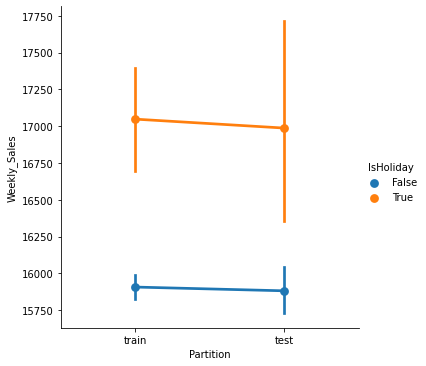

In [12]:
sns.catplot(data=df, x='Partition', y='Weekly_Sales', hue='IsHoliday', kind='point')
plt.show()

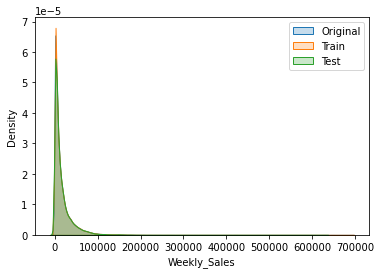

In [13]:
fig, ax = plt.subplots()
sns.kdeplot(data=df, ax=ax, x='Weekly_Sales', shade=True, label='Original')
sns.kdeplot(data=sales_train, ax=ax, x='Weekly_Sales', shade=True, label='Train')
sns.kdeplot(data=sales_test, ax=ax, x='Weekly_Sales', shade=True, label='Test')
ax.legend()
plt.show()

The distributions of the Weekly_Sales across train and test seem to be very similar. This holds even when the partitions are investigated based on the IsHoliday variable. 

---
### Undersampling and Oversampling in Python


**We always do not oversample or undersample in regards to the target variable. In some cases, we want certain groups of data to have equal representation in the training data. Having this in mind, use the "Sales" data and create an 80%-20% train-test partition where the train partition is oversampled regarding the IsHoliday variable. Perform the same task using undersampling as well. In the end, show that the training dataset is balanced in regards to IsHoliday.**

In [14]:
df = pd.read_csv('Retail_Data_Sales.csv')
df.groupby(by=['IsHoliday']).size()

IsHoliday
False    391909
True      29661
dtype: int64

In [15]:
df['Partition'] = np.random.choice(['train', 'test'], len(df), p=[0.8,0.2])
sales_train = df[df['Partition'] == 'train']
sales_test = df[df['Partition'] == 'test']

sales_train_true = sales_train[sales_train['IsHoliday'] == True]
sales_train_false = sales_train[sales_train['IsHoliday'] == False]

over = sales_train_true.sample(n=sales_train_false.shape[0], replace=True)

sales_train_bal = pd.concat([sales_train_false, over])
sales_train_bal.groupby(by=['IsHoliday']).size()

IsHoliday
False    313775
True     313775
dtype: int64

In [16]:
# Undersampling
df['Partition'] = np.random.choice(['train', 'test'], len(df), p=[0.8,0.2])
sales_train = df[df['Partition'] == 'train']
sales_test = df[df['Partition'] == 'test']

sales_train_1 = sales_train[sales_train['IsHoliday'] == 1]
sales_train_0 = sales_train[sales_train['IsHoliday'] == 0]
print(sales_train_1.shape)
print(sales_train_0.shape)

(23777, 6)
(313509, 6)


In [17]:
under = sales_train_0.sample(n=sales_train_1.shape[0])

In [18]:
sales_train_bal = pd.concat([under, sales_train_1])
sales_train_bal.groupby(by=['IsHoliday']).size()

IsHoliday
False    23777
True     23777
dtype: int64